<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/ML_project_novelty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Load the dataset (replace with your dataset path)
path='/content/drive/MyDrive/Datasets/pwr_raw.csv'
data = pd.read_csv(path, sep=r'\s+', header=None)

# Create new column names
column_names = [f'rod_{i}' for i in range(1, 40)] + ['k_inf', 'pppf']

print(data.head())

# Assign the new column names to the DataFrame
data.columns = column_names

# Check the updated column names
print(data.columns)

print(data.head())


        0         1         2         3         4         5         6   \
0  1.32630  1.862086  3.562615  1.112359  4.208065  1.412679  2.271031   
1  1.34149  1.786558  2.354766  1.047929  2.268974  4.637777  3.793194   
2  1.33034  1.826187  3.037997  4.719517  1.502280  3.644736  3.575727   
3  1.35653  1.739225  4.412804  2.220680  3.132738  1.327124  4.759890   
4  1.30190  1.955829  2.790669  0.798177  1.231750  1.977844  2.393930   

         7         8         9   ...        31        32        33        34  \
0  3.950614  3.627032  4.600332  ...  3.965987  4.030999  0.826347  2.088521   
1  2.859702  4.361058  3.592485  ...  2.228000  4.837370  2.846538  3.413201   
2  1.337686  2.380347  4.503771  ...  2.615278  3.757999  3.161658  4.996056   
3  2.882082  3.663430  4.531524  ...  3.899026  1.018926  4.379308  3.280298   
4  4.738126  1.364743  3.391665  ...  3.641512  1.564076  2.178406  2.754888   

         35        36        37        38        39        40  
0  4.08855

Basic Statistics Summary:
              rod_1         rod_2         rod_3         rod_4         rod_5  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       1.325139      1.883559      2.855694      2.859994      2.857451   
std        0.017798      0.120018      1.240040      1.238304      1.237204   
min        1.246360      1.527497      0.700055      0.700098      0.700080   
25%        1.313650      1.798641      1.778343      1.784898      1.785185   
50%        1.326085      1.876336      2.855621      2.869736      2.873263   
75%        1.337683      1.960852      3.935998      3.931073      3.921500   
max        1.385580      2.473015      4.999537      4.999781      4.999613   

              rod_6         rod_7         rod_8         rod_9        rod_10  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       2.867554      2.848997      2.840123      2.867360      2.850948   
std        1.234584      

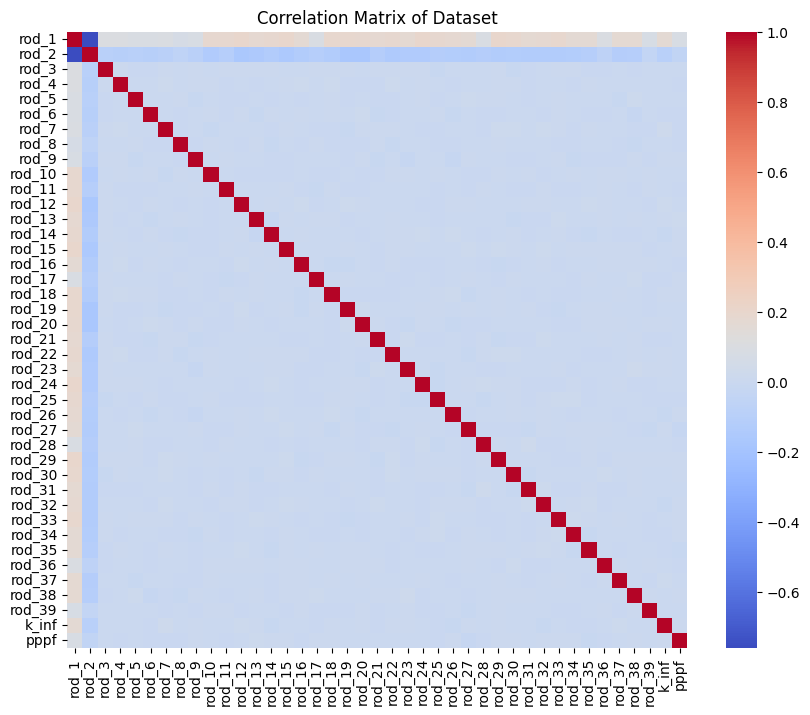

Top 5 features most correlated with k_inf:
rod_1     0.164963
rod_7     0.020003
rod_37    0.014001
rod_12    0.013470
rod_9     0.009265
Name: k_inf, dtype: float64

Top 5 features most correlated with PPPF:
rod_1     0.080209
rod_13    0.013118
rod_38    0.008900
rod_9     0.008477
rod_32    0.007710
Name: pppf, dtype: float64

T-Test between rod_1 and rod_2 enrichment values:
T-Statistic: -713.0103969504397, P-Value: 0.0
There is a significant difference between rod_1 and rod_2.

Top 5 features with the highest variance:
rod_19    1.558159
rod_17    1.556951
rod_24    1.556635
pppf      1.554615
rod_12    1.551436
dtype: float64


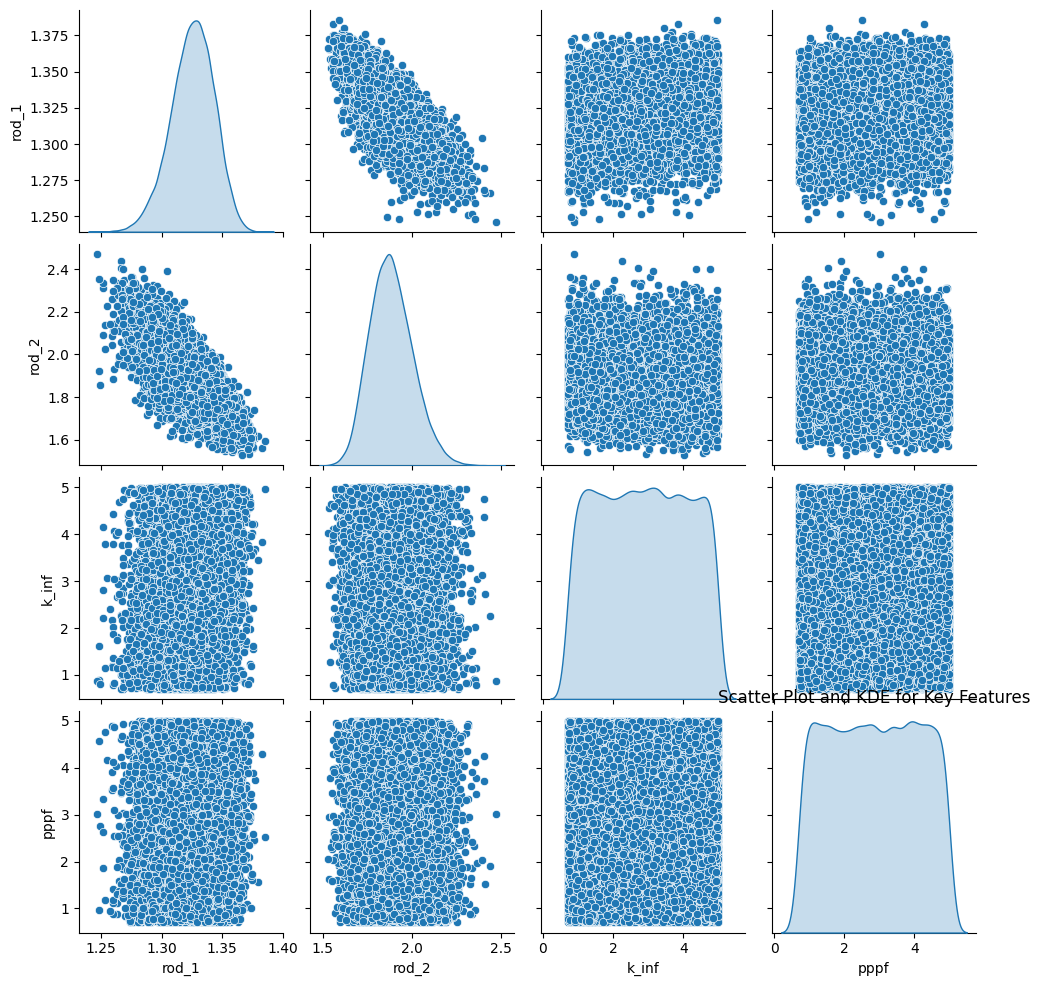

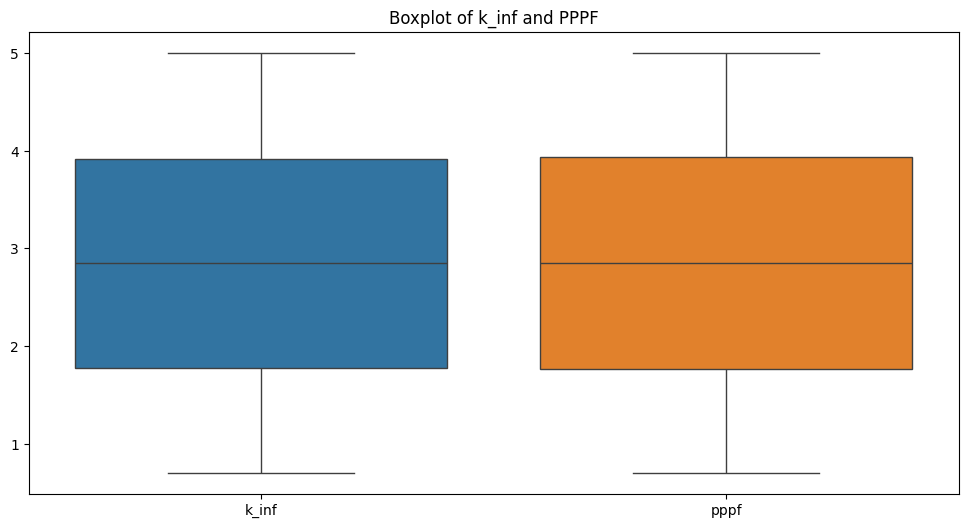

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Basic Statistical Metrics
stats_summary = data.describe()
print("Basic Statistics Summary:")
print(stats_summary)

# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Dataset")
plt.show()

# Insights from Correlation with k_inf and PPPF
print("Top 5 features most correlated with k_inf:")
print(correlation_matrix['k_inf'].sort_values(ascending=False).head(6)[1:])

print("\nTop 5 features most correlated with PPPF:")
print(correlation_matrix['pppf'].sort_values(ascending=False).head(6)[1:])

# Hypothesis Testing (T-Test)
# Compare distributions of two random rods with respect to k_inf
rod_1 = data['rod_1']
rod_2 = data['rod_2']

t_stat, p_value = ttest_ind(rod_1, rod_2)
print("\nT-Test between rod_1 and rod_2 enrichment values:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# If p-value < 0.05, there is a statistically significant difference
if p_value < 0.05:
    print("There is a significant difference between rod_1 and rod_2.")
else:
    print("There is no significant difference between rod_1 and rod_2.")

# Feature Variance Analysis
feature_variances = data.var().sort_values(ascending=False)
print("\nTop 5 features with the highest variance:")
print(feature_variances.head(5))

# Scatter Plot for Key Features
sns.pairplot(data[['rod_1', 'rod_2', 'k_inf', 'pppf']], diag_kind='kde')
plt.title("Scatter Plot and KDE for Key Features")
plt.show()

# Boxplot to check distribution of k_inf and PPPF
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['k_inf', 'pppf']])
plt.title("Boxplot of k_inf and PPPF")
plt.show()

In [3]:
# Bayesian
import numpy as np
import pandas as pd
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = data.drop(columns=['k_inf', 'pppf'])  # Fuel rod enrichment values
y = data[['k_inf', 'pppf']]  # Target variables

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model for optimization (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the search space for Bayesian optimization
param_space = {
    'max_depth': Integer(1, 20),  # max_depth must be an integer between 1 and 20
    'min_samples_split': Integer(2, 10),  # min_samples_split as an integer between 2 and 10
    'min_samples_leaf': Real(0.01, 0.1, 'uniform'),  # min_samples_leaf as a float between 0.01 and 0.1
}

# Initialize Bayesian Optimization with the corrected param_space
opt = BayesSearchCV(model, param_space, n_iter=50, cv=3, random_state=42)

# Fit the model to the training data using Bayesian Optimization
opt.fit(X_train, y_train)

# Best parameters found through Bayesian Optimization
print("Best parameters:", opt.best_params_)




Best parameters: OrderedDict([('max_depth', 20), ('min_samples_leaf', 0.01), ('min_samples_split', 2)])


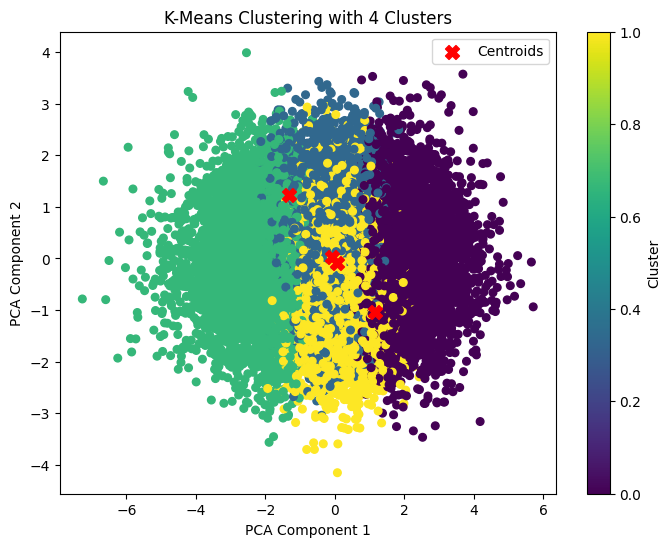

Cluster sizes:
Cluster
1    6351
3    6274
0    6041
2    5334
Name: count, dtype: int64


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (k)
k = 4  # Adjust 'k' based on the dataset or use Elbow Method to determine the optimal number of clusters

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Use PCA for 2D visualization of clusters (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Print cluster sizes
print("Cluster sizes:")
print(data['Cluster'].value_counts())


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Define features and target
X = data.drop(columns=['k_inf', 'pppf'])  # Features (fuel rod enrichments)
y_k_inf = data['k_inf']  # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_k_inf, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE): {mae}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.0881 - mae: 1.1651 - val_loss: 1.0092 - val_mae: 0.8380
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7395 - mae: 0.7039 - val_loss: 0.5200 - val_mae: 0.5869
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4483 - mae: 0.5427 - val_loss: 0.4878 - val_mae: 0.5693
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3809 - mae: 0.4998 - val_loss: 0.4426 - val_mae: 0.5417
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3541 - mae: 0.4827 - val_loss: 0.4390 - val_mae: 0.5400
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3289 - mae: 0.4641 - val_loss: 0.4410 - val_mae: 0.5417
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.3218 - mae: 0.4598 - val_loss: 0.4281 - val_mae: 0.5340
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3093 - mae: 0.4511 - val_loss: 0.4357 - val_mae: 0.5375
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - l